In [1]:
#import libraries

import matplotlib.pyplot as plt # plotting
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import shap
from imblearn.over_sampling import SMOTE
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#load the pycaret module
from pycaret.classification import *

from sklearn.model_selection import GridSearchCV
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
# evaluate model for classification
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks



### Load Data

In [2]:
file1 = "/Users/ayadav/Downloads/term-deposit-marketing-2020.csv"

In [3]:
df = pd.read_csv(file1)

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
df.y.value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [8]:
df.shape

(40000, 14)

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

## Data Visualization

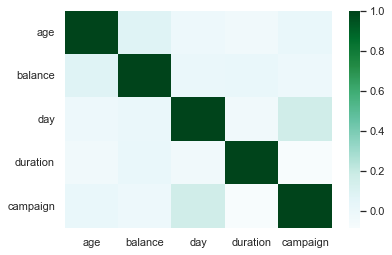

In [10]:
sns.heatmap(df.corr(), cmap='BuGn')

### to visualize all the columns in heatmap, need to label the categorical values and them to number

In [11]:
### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))


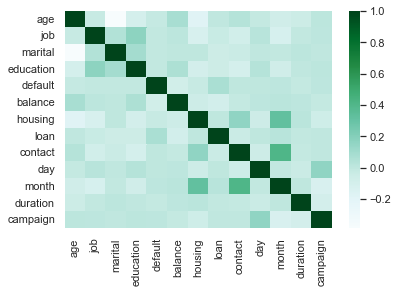

In [12]:
sns.heatmap(df.corr(), cmap='BuGn')

## checking null values

In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

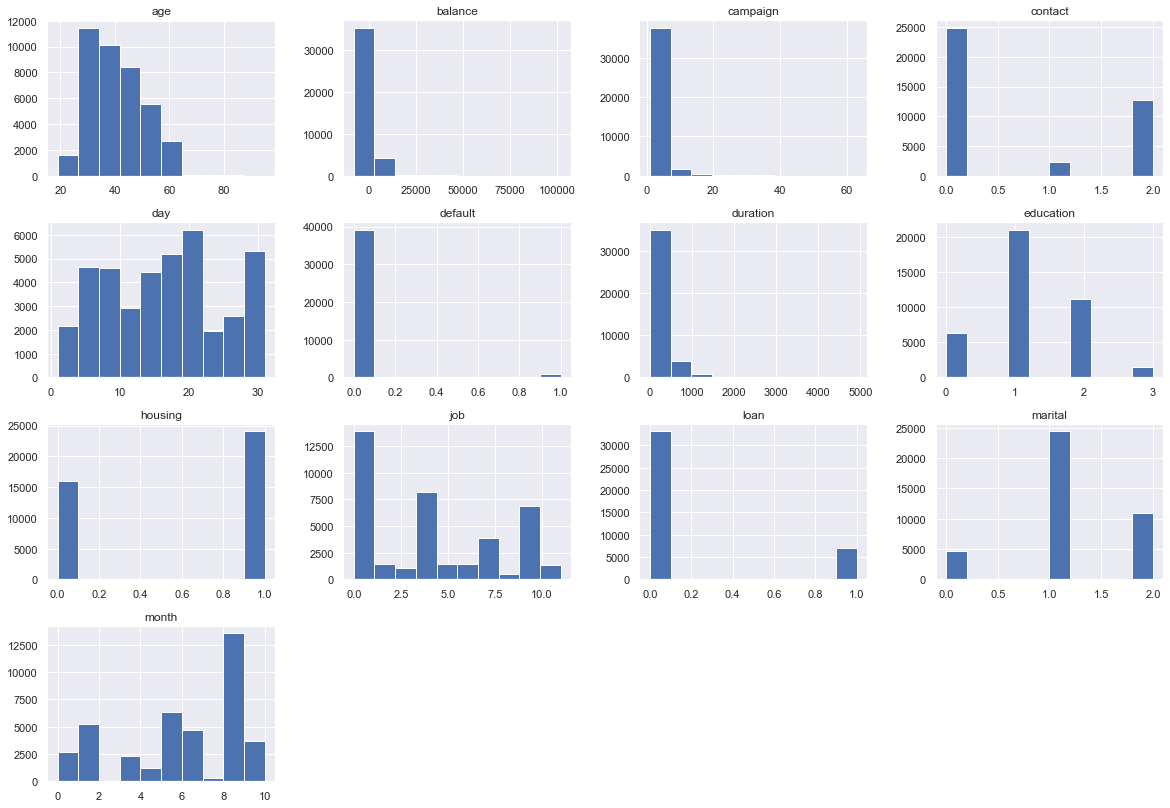

In [14]:
df.hist(figsize=(20,14))
plt.show()

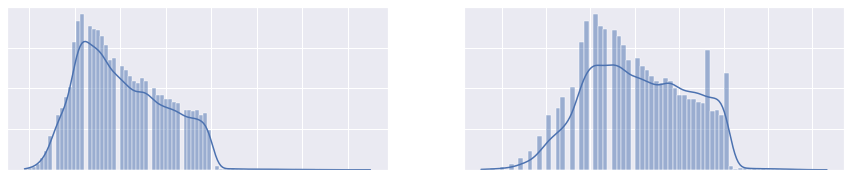

In [102]:
from scipy import stats
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df['age'])

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df['age'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

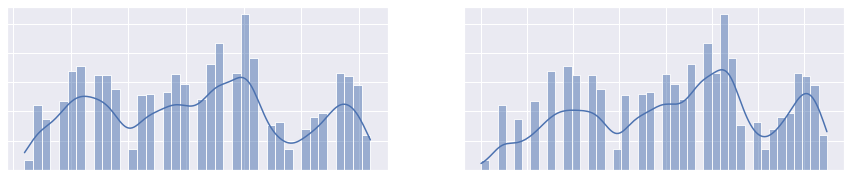

In [103]:
from scipy import stats
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df['day'])

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df['day'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

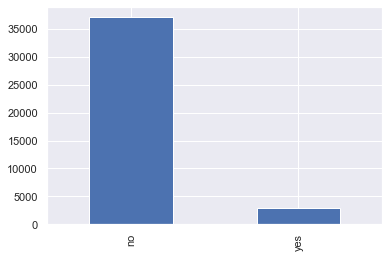

In [15]:
target = df['y']
target.value_counts().plot.bar()

### Data looks pretty imbalance, first we will run the pycaret model on default data sets and hypertune the best model with defult datasets to check the accuracy of model

##  Machine Learning

In [16]:
# Splitting data into training and testing
# Separate out the features and targets
X = df.drop(columns='y')
y = pd.DataFrame(df['y'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 13)
(8000, 13)
(32000, 1)
(8000, 1)


## Pycaret Module

In [20]:
data = df.sample(frac=0.95, random_state=486)
data_unseen = df.drop(df.index)
df.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (38000, 14)
Unseen Data For Predictions: (0, 14)


In [21]:
exp_name = setup(data = data,  target = 'y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(38000, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [22]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.9372,0.9427,0.3644,0.6102,0.4554,0.4244,0.4408,1.9512
1,Light Gradient Boosting Machine,0.9372,0.9464,0.4021,0.5985,0.4799,0.4479,0.4585,0.1771
2,CatBoost Classifier,0.9371,0.9483,0.3943,0.5975,0.4746,0.4427,0.4537,7.9758
3,Extreme Gradient Boosting,0.9354,0.9407,0.4138,0.5729,0.4803,0.4469,0.4537,3.6942
4,Linear Discriminant Analysis,0.9339,0.9291,0.4339,0.5537,0.4858,0.4511,0.4553,0.0964
5,Ridge Classifier,0.9324,0.0000,0.1509,0.6384,0.2428,0.2214,0.2869,0.0135
6,Logistic Regression,0.9322,0.8897,0.2225,0.5829,0.3205,0.2924,0.3311,0.1457
7,Extra Trees Classifier,0.9317,0.9172,0.2193,0.5711,0.3162,0.2877,0.3250,0.3591
8,Random Forest Classifier,0.9315,0.8949,0.2408,0.5616,0.3365,0.3065,0.3376,0.1143
9,Ada Boost Classifier,0.9304,0.9285,0.3207,0.5306,0.3994,0.3648,0.3781,0.5596


## Light Gradient boosting Model with default parameter 

In [25]:
lgb = LGBMClassifier()

In [26]:
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb=GridSearchCV(lgb,param_grid=params2)

In [27]:
grid_lgb.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_dep

### Light Gradient boosting Model with best parameter

In [27]:
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 8}

In [34]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=500, num_leaves = 8)
lgbclf.fit(X,y)
print(lgbclf.score(X,y))
print(lgbclf.score(X_train,y_train))
print(lgbclf.score(X_test,y_test))


0.9501842105263157
0.9498566661967198
0.9511018528670102


In [35]:
y_pred=lgbclf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8462
           1       0.75      0.49      0.59       659

    accuracy                           0.95      9121
   macro avg       0.85      0.74      0.78      9121
weighted avg       0.95      0.95      0.95      9121



In [39]:

# Separate out the features and targets
#X = df.drop(columns='y')


# Split into 80% training and 20% testing set
#X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)
#print(X_train.shape)

# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>10 0.929 (0.001)
>50 0.939 (0.001)
>100 0.939 (0.002)
>500 0.937 (0.002)
>1000 0.936 (0.002)


### Now we will balance the data through upscaling and then compare the accuracy between balanced and unbalanced data with best model

In [40]:
from sklearn.utils import resample

#setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

#concatenate our training data back together
X1 = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
No = X1[X1.y==0]
Yes = X1[X1.y==1]

# upsample minority
termdeposit_upsampled = resample(Yes,
                          replace=True, # sample with replacement
                          n_samples=len(No), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([No, termdeposit_upsampled])

# check new class counts
upsampled.y.value_counts()

   

1    19742
0    19742
Name: y, dtype: int64

In [41]:
upsampled

,age,balance,day,duration,campaign,job_0,job_1,job_10,job_11,job_2,...,month_10,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,y
28476,27.0,1459.0,29.0,153.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
36745,39.0,175.0,12.0,17.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
20757,34.0,4367.0,13.0,121.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15889,43.0,307.0,21.0,145.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
32574,32.0,435.0,17.0,456.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26018,43.0,347.0,19.0,1468.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
36654,58.0,119.0,12.0,985.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
33902,45.0,160.0,30.0,619.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4416,35.0,0.0,20.0,1205.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


### Load pycaret model on above balance datasets

In [42]:
data = upsampled.sample(frac=0.95, random_state=486)
data_unseen = df.drop(df.index)
upsampled.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37510, 45)
Unseen Data For Predictions: (0, 14)


In [43]:
exp_name = setup(data = data,  target = 'y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(37510, 45)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,39
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [44]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9840,0.9998,0.9987,0.9702,0.9842,0.9680,0.9684,0.5999
1,Random Forest Classifier,0.9726,0.9985,0.9980,0.9498,0.9733,0.9452,0.9464,0.1142
2,Decision Tree Classifier,0.9654,0.9654,0.9987,0.9364,0.9666,0.9308,0.9329,0.1391
3,Extreme Gradient Boosting,0.9438,0.9785,0.9867,0.9088,0.9462,0.8876,0.8909,5.7051
4,CatBoost Classifier,0.9377,0.9745,0.9797,0.9040,0.9403,0.8755,0.8786,8.2279
5,Light Gradient Boosting Machine,0.9264,0.9689,0.9751,0.8888,0.9299,0.8529,0.8570,0.2409
6,K Neighbors Classifier,0.8996,0.9489,0.9830,0.8427,0.9075,0.7992,0.8106,0.0744
7,Gradient Boosting Classifier,0.8869,0.9466,0.9160,0.8658,0.8902,0.7737,0.7751,3.3007
8,Ada Boost Classifier,0.8623,0.9310,0.8604,0.8640,0.8622,0.7246,0.7247,0.9004
9,Ridge Classifier,0.8480,0.0000,0.8146,0.8732,0.8428,0.6960,0.6976,0.0224


In [42]:
lgb = LGBMClassifier()

In [45]:
# get a list of models to evaluate
X2 = upsampled.drop(['y'], axis=1)
y2 = pd.DataFrame(upsampled['y'])
def get_models():
	models = dict()
	trees = [ 50, 100, 500, 1000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model,X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>50 0.924 (0.003)
>100 0.938 (0.002)
>500 0.969 (0.002)
>1000 0.977 (0.002)


In [40]:
X2 = upsampled.drop(['y'], axis=1)
y2 = pd.DataFrame(upsampled['y'])

In [46]:
lgb = LGBMClassifier()

In [47]:
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb=GridSearchCV(lgb,param_grid=params2)

In [49]:
grid_lgb.fit(X2,y2)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_dep

In [50]:
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 125}

In [51]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=5,n_estimators=1000, num_leaves = 125)
lgbclf.fit(X2,y2)
y_pred=lgbclf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
#print(lgbclf.score(X2,y2))
#print(lgbclf.score(X2_train,y2_train))
#print(lgbclf.score(X_test,y_test))

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8462
           1       0.47      0.62      0.53       659

    accuracy                           0.92      9121
   macro avg       0.72      0.78      0.75      9121
weighted avg       0.93      0.92      0.93      9121



## we will see which feature are important for prediction for this model. Use SHAP to do so

In [48]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(lgbclf)
shap_values = explainer.shap_values(X_importance)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


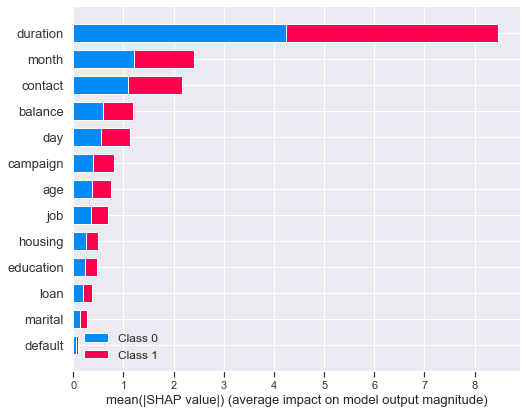

In [49]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

### Feature Selection on balanced dataset

In [53]:
# generate dataset
X = upsampled.drop(['y'], axis=1)

y = upsampled['y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=13)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
   

(59360, 13)


In [57]:
X3 = upsampled.drop(['y'], axis=1)

y3 = upsampled['y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X3, y3)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X3)
# summarize selected features
print(features[0:5,:])

[7.321e+01 1.591e+02 1.888e+02 3.075e+02 7.583e+00 1.581e+02 6.956e+02
 2.151e+02 2.169e+03 7.319e+00 1.143e+01 2.753e+04 4.743e+02]
[[  1   0 238   3]
 [  1   0 176   4]
 [  0   2 136   2]
 [  1   0 796   2]
 [  1   0 102   1]]


### Age, default, house loan, day, month and campaign are important features for the client.  

In [55]:
upsampled.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

### Accuracy with LGBM model went down from 94%(for imbalanced datasets) to 92%(balanced datasets) whereas F1 score increased. 

### Try other upsampling method to improve F1 score

### Finally like to apply random forestclassifier using  SMOTE-Tomek Links method. First we will check the accuracy, recall and precision in imbalanced datasets and then use SMOTE-Tomek Links method to make balance datasets

### Without SMOTE-Tomek Links, the model performance that is produced is as follows.
Mean Accuracy: 0.9356
Mean Precision: 0.7773
Mean Recall: 0.6515
As we can expect from the imbalanced dataset, the accuracy metric score is very high, but the recall metric score is pretty low (around 0.65). This means that the model failed to “learn” the minority class well, thus failed to correctly predict the minority class label

### SMOTE-Tomek Links
Introduced first by Batista et al. (2003), this method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class (that is, samples of data from the majority class that is closest with the minority class data). The process of SMOTE-Tomek Links is as follows.
1. (Start of SMOTE) Choose random data from the minority class.
2. Calculate the distance between the random data and its k nearest neighbors.
3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4. Repeat step number 2–3 until the desired proportion of minority class is met. (End of SMOTE)
5. (Start of Tomek Links) Choose random data from the majority class.
6. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
To understand more about this method in practice, here I will give some example of how to implement SMOTE-Tomek Links in Python using imbalanced-learn library. The model that we will use is Random Forest by using RandomForestClassifier . For the evaluation procedure, here I will use the Repeated Stratified K-fold Cross Validation method to ensure that we preserve the percentages of samples for each class in each fold (i.e. each fold must have some samples in each class) with different randomization in each repetition.

#### Let’s see if we can improve the model’s performance by using SMOTE-Tomek

In [107]:
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

In [108]:
lgbclf2=LGBMClassifier(learning_rate=0.1,max_depth=8,n_estimators=500, num_leaves = 125)
lgbclf2.fit(X_res, y_res)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LGBMClassifier(max_depth=8, n_estimators=500, num_leaves=125)

In [109]:
y_pred = lgbclf2.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.97      0.95      0.96      7424
         yes       0.48      0.58      0.53       576

    accuracy                           0.93      8000
   macro avg       0.73      0.76      0.74      8000
weighted avg       0.93      0.93      0.93      8000



#### The accuracy and precision metrics might decrease, but we can see that the recall metric are higher, it means that the model performs better to correctly predict the minority class label by using SMOTE-Tomek Links to handle the imbalanced data.

#### SMOTE for upscaling

In [53]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [54]:
X_res.shape

(39484, 44)

In [55]:
type(y_res)

pandas.core.series.Series

In [56]:
grid_lgb.fit(X_res, y_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_dep

In [57]:
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 8}

In [58]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=500, num_leaves =8)
lgbclf.fit(X_res, y_res)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=8, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [59]:
y_pred=lgbclf.predict(X_test)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8462
           1       0.61      0.41      0.49       659

    accuracy                           0.94      9121
   macro avg       0.78      0.70      0.73      9121
weighted avg       0.93      0.94      0.93      9121



### Undersampling

In [17]:
from imblearn.under_sampling import TomekLinks  
tl = TomekLinks()
X_res5, y_res5 = tl.fit_resample(X_train, y_train)

In [18]:
lgb2 = LGBMClassifier()
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb2=GridSearchCV(lgb2,param_grid=params2)

In [19]:
grid_lgb2.fit(X_res5, y_res5)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [8, 27, 125]})

In [20]:
grid_lgb2.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 27}

In [24]:
lgbclf2=LGBMClassifier(learning_rate=0.01,max_depth=6,n_estimators=1000, num_leaves = 27)
lgbclf2.fit(X_res5, y_res5)

LGBMClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000,
               num_leaves=27)

In [25]:
y_pred4=lgbclf2.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

          no       0.96      0.97      0.97      7424
         yes       0.58      0.51      0.54       576

    accuracy                           0.94      8000
   macro avg       0.77      0.74      0.76      8000
weighted avg       0.93      0.94      0.94      8000



### Our precision and recall both are above 50% by doing undersampling

In [26]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(lgbclf2)
shap_values = explainer.shap_values(X_importance)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


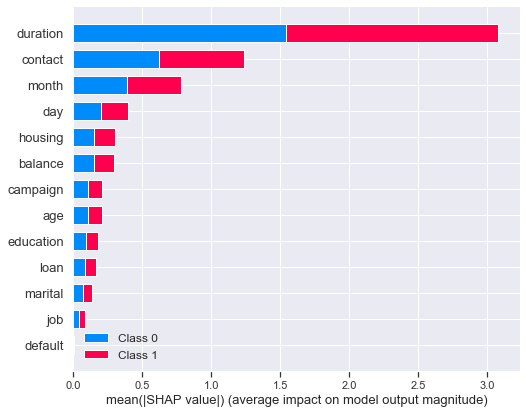

In [27]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

In [105]:
# generate dataset
#X = upsampled.drop(['y'], axis=1)

#y = upsampled['y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=13)
# apply feature selection
X_selected = fs.fit_transform(X_res5, y_res5)
print(X_selected.shape)
   

(31120, 13)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [106]:
#X3 = upsampled.drop(['y'], axis=1)

#y3 = upsampled['y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X_res5, y_res5)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_res5)
# summarize selected features
print(features[0:5,:])

[1.191e+01 1.158e+01 3.376e+01 5.004e+01 9.159e-01 2.852e+01 1.094e+02
 3.099e+01 2.675e+02 1.143e+00 6.980e+01 1.013e+04 5.162e+01]
[[  1   0   5 238]
 [  1   0   5 176]
 [  0   2   6 136]
 [  1   0   9 102]
 [  1   2   8 157]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Duration is the most important factor in determining if the customer go for term deposit or not. Other important features are way we conatct them, housing, balance, campaign and age. Least important factors in prediction are marital status and job type. 